In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [2]:
train_set_url_20_balanced = "data/KDDTrain_20%_balanced.csv"
test_set_url_20 = "data/KDDTest_for20%_processed.csv"

df_train = pd.read_csv(train_set_url_20_balanced)
df_test = pd.read_csv(test_set_url_20)

# Split the dataset into features and target
X = df_train.drop('attack_class', axis=1)
y = df_train['attack_class']

X_test = df_test.drop('attack_class', axis=1)
y_test = df_test['attack_class']

In [15]:
from joblib import load
from tensorflow.keras.models import load_model

dt = load('models/decision_tree_model.joblib')
knn = load('models/knn_model.joblib')
nb = load('models/naive_bayes_model.joblib')
lr = load('models/logistic_regression_model.joblib')
svm = load('models/svc_model.joblib')
rf = load('models/random_forest_model.joblib')
adaboost = load('models/adaboost_model.joblib')
nn = load_model('models/nn_model.keras')

# list of models
models = [
    ('Sklearn Decision Tree', dt),
    ('Sklearn KNN', knn),
    ('Sklearn Naive Bayes', nb),
    ('Sklearn Logistic Regression', lr),
    ('Sklearn SVM', svm),
    ('Sklearn Random Forest', rf),
    ('Sklearn AdaBoost', adaboost),
    ('Keras Neural Network', nn)
]

In [17]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Define a function to calculate accuracy and F1-score for sklearn models
def evaluate_sklearn_model(name, model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy and F1-score (weighted due to multi-class)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    return {'name': name, 'accuracy': accuracy, 'f1': f1}

# Define a function to calculate accuracy and F1-score for Keras models
def evaluate_keras_model(name, model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    # Calculate accuracy and F1-score (weighted due to multi-class)
    accuracy = accuracy_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class, average='weighted')

    return {'name': name, 'accuracy': accuracy, 'f1': f1}

In [18]:
# Evaluate each model
results = []
for name, model in models:
    if 'Sklearn' in name:
        results.append(evaluate_sklearn_model(name, model, X_test, y_test))
    elif 'Keras' in name:
        results.append(evaluate_keras_model(name, model, X_test, y_test))

# Print accuracy and F1-score for comparison
for result in results:
    print(f"{result['name']} - Accuracy: {result['accuracy']:.2f}, F1-Score: {result['f1']:.2f}")

705/705 [==============================] - 1s 1ms/step
Sklearn Decision Tree - Accuracy: 0.74, F1-Score: 0.70
Sklearn KNN - Accuracy: 0.76, F1-Score: 0.73
Sklearn Naive Bayes - Accuracy: 0.68, F1-Score: 0.67
Sklearn Logistic Regression - Accuracy: 0.78, F1-Score: 0.76
Sklearn SVM - Accuracy: 0.78, F1-Score: 0.76
Sklearn Random Forest - Accuracy: 0.77, F1-Score: 0.75
Sklearn AdaBoost - Accuracy: 0.69, F1-Score: 0.70
Keras Neural Network - Accuracy: 0.75, F1-Score: 0.71


C:\Users\GIANLUCA\AppData\Local\Temp\ipykernel_22928\1976969676.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(model_names, rotation=45, ha='right')


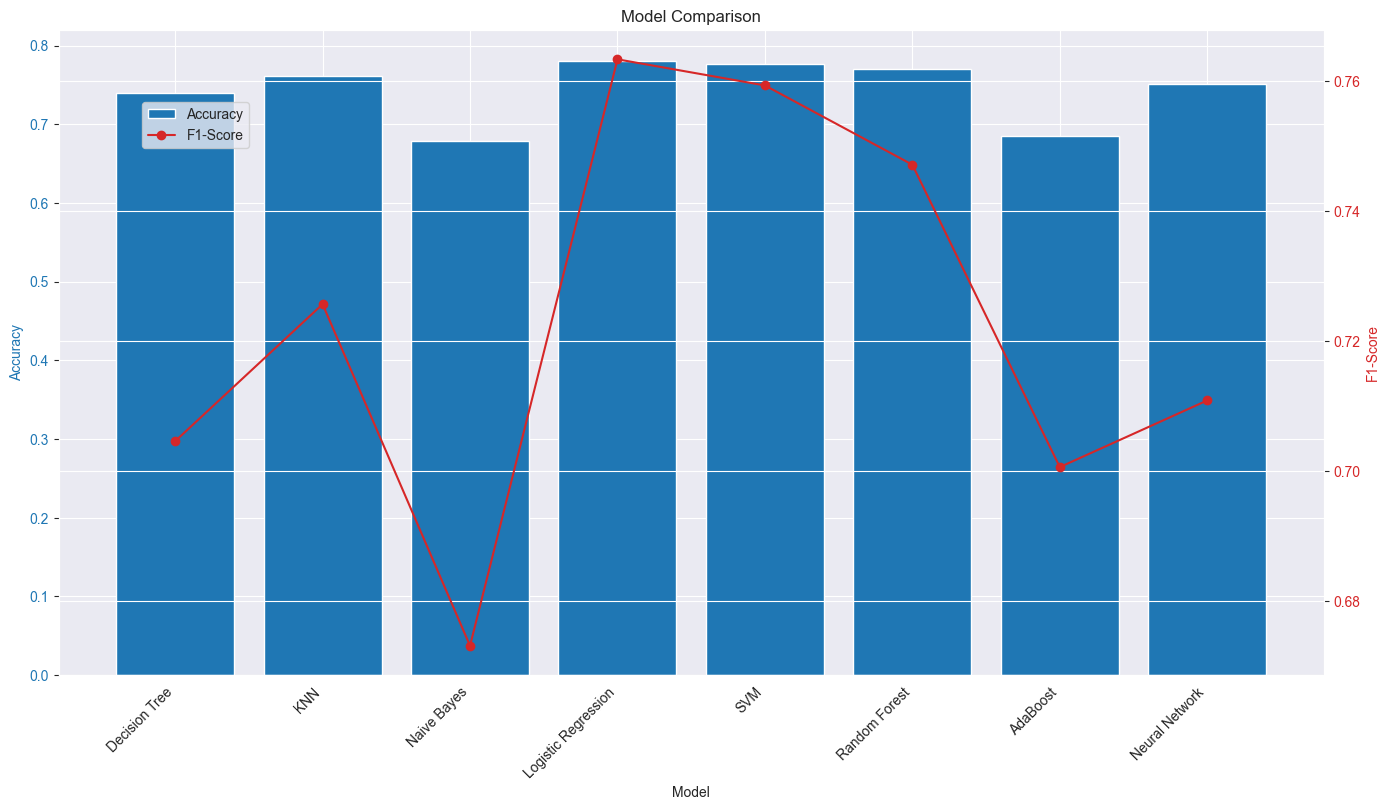

In [22]:
import matplotlib.pyplot as plt

# Assuming `results` contains the evaluation results
# First, sort the results by accuracy
results_sorted_by_accuracy = sorted(results, key=lambda x: x['accuracy'], reverse=True)

# Then, extract names, accuracies, and F1-scores for plotting
model_names = [result['name'].replace('Sklearn ', '').replace('Keras ', '') for result in results]
accuracies = [result['accuracy'] for result in results]
f1_scores = [result['f1'] for result in results]

# Set up the matplotlib figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot accuracy
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.bar(model_names, accuracies, color='tab:blue', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(model_names, rotation=45, ha='right')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot F1-score
ax2.set_ylabel('F1-Score', color='tab:red')
ax2.plot(model_names, f1_scores, color='tab:red', marker='o', label='F1-Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and legends
fig.tight_layout()
plt.title('Model Comparison')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show plot
plt.show()